In [2]:
import pandas as pd

In [3]:
import json
from pandas import json_normalize

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
with open('/content/drive/MyDrive/CASE_IFOOD/ifood-vamoai.json') as data_file:    
  data = json.load(data_file)

In [6]:
df = json_normalize(data)
df.head()

,id,shortId,createdAt,updatedAt,closedAt,lastStatus,details.mode,details.scheduled,details.tippable,details.indoorTipEnabled,details.trackable,details.boxable,details.placedAtBox,details.reviewed,details.darkKitchen,delivery.address.city,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.complement,delivery.driver.id,delivery.driver.name,delivery.driver.photoUrl,delivery.driver.modal,delivery.estimatedTimeOfArrival.deliversAt,delivery.estimatedTimeOfArrival.updatedAt,delivery.expectedDeliveryTime,delivery.expectedDuration,merchant.address.establishment,merchant.address.city,merchant.address.country,merchant.address.neighborhood,merchant.address.state,merchant.address.streetName,merchant.address.streetNumber,merchant.address.coordinates.latitude,merchant.address.coordinates.longitude,merchant.address.reference,merchant.address.complement,merchant.id,merchant.name,merchant.phoneNumber,merchant.logo,merchant.companyGroup,merchant.type,payments.methods,payments.total.currency,payments.total.value,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.items,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,origin.platform,origin.appName,origin.appVersion,deliveryMethod.id,deliveryMethod.mode,review.reviewedAt,review.score,details.cancellation.code,details.cancellation.reason,delivery.estimatedTimeOfArrival.reason
0,5f2c646e-2e52-497f-8fa3-5d642f43ce45,2919873206,2021-02-25T12:22:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:39:21-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,050f3047-2878-4a80-b56b-5a0bb3c349b9,Gildarle Silva,https://nv-production-logistics-driver-account...,MOTORCYCLE,2021-02-25T12:43:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:43:01-03:00,1260,,POA,BR,VILA ACOREANA,SP,R RAIMUNDO CORREIA,38,-23.517951,-46.341367,,,84d619e6-9c4c-44a7-83c3-e52632f80e52,Spumoni Restaurante e Sorveteria,40030053,84d619e6-9c4c-44a7-83c3-e52632f80e52/201909261...,IFD,RESTAURANT,[{'id': '83e91c55-f778-430f-a13a-0467508fd9df'...,BRL,2549,[],549,549,[{'id': 'f7e42041-6b2c-4b33-94ac-464117949826'...,2000,2000,2549,2549,False,ANDROID,iFood,9.90.0,DEFAULT,DELIVERY,NaN,NaN,NaN,NaN,NaN
1,366b27ed-9e4d-4da5-bbb5-e21ded9b3520,2900401480,2021-02-19T19:39:01-03:00,2021-02-19T20:03:37-03:00,2021-02-19T20:03:05-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,c22a2557-0eb2-413d-b26f-6183adc67af1,Jefferson Silva,https://nv-production-logistics-driver-account...,BICYCLE,2021-02-19T20:20:01-03:00,2021-02-19T20:03:37-03:00,2021-02-19T20:20:01-03:00,2460,,POA,BR,Centro,SP,AV PROF LUIZ CARLOS BUENO,340,-23.519404,-46.339485,,,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3,Burger King - Av. Prof Luiz C Bueno,40030706,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3/202102121...,IFD,RESTAURANT,[{'id': '13e5507f-c1da-45b4-b8b8-5742ed04a4a5'...,BRL,12319,[],649,649,[{'id': 'a67f0608-2a70-4ec8-bcb8-75984a14bd7c'...,11670,11670,12319,12319,False,ANDROID,iFood,9.89.1,DEFAULT,DELIVERY,NaN,NaN,NaN,NaN,NaN
2,16ea5252-dba3-49d9-99ca-d39f6266c367,2886987691,2021-02-16T12:35:43-03:00,2021-02-16T13:05:45-03:00,2021-02-16T13:04:42-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,6e5f6a37-9d68-4ab0-8919-aefa50b30f60,Matheus Costa,https://nv-production-logistics-driver-account...,MOTORCYCLE,2021-02-16T12:56:43-03:00,2021-02-16T13:05:45-03:00,2021-02-16T12:56:43-03:00,1260,,POA,BR,VILA ACOREANA,SP,R RAIMUNDO CORREIA,38,-23.517951,-46.341367,,,84d619e6-9c4c-44a7-83c3-e52632f80e52,Spumoni Restaurante e Sorveteria,40030053,84d6

In [7]:
df.shape

(82, 71)

### Desaninhando o json de payments.methods, bag.items e bag.items.subitems

In [8]:
df_payment=pd.json_normalize(json.loads(df.explode('payments.methods').to_json(orient="records")))
df_payment.head()

,id,shortId,createdAt,updatedAt,closedAt,lastStatus,details.mode,details.scheduled,details.tippable,details.indoorTipEnabled,details.trackable,details.boxable,details.placedAtBox,details.reviewed,details.darkKitchen,delivery.address.city,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.complement,delivery.driver.id,delivery.driver.name,delivery.driver.photoUrl,delivery.driver.modal,delivery.estimatedTimeOfArrival.deliversAt,delivery.estimatedTimeOfArrival.updatedAt,delivery.expectedDeliveryTime,delivery.expectedDuration,merchant.address.establishment,merchant.address.city,merchant.address.country,merchant.address.neighborhood,merchant.address.state,merchant.address.streetName,merchant.address.streetNumber,merchant.address.coordinates.latitude,...,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.items,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,origin.platform,origin.appName,origin.appVersion,deliveryMethod.id,deliveryMethod.mode,review.reviewedAt,review.score,details.cancellation.code,details.cancellation.reason,delivery.estimatedTimeOfArrival.reason,payments.methods.id,payments.methods.method.name,payments.methods.method.description,payments.methods.type.name,payments.methods.type.description,payments.methods.brand.id,payments.methods.brand.image,payments.methods.brand.name,payments.methods.brand.description,payments.methods.mealVoucher.cardNumber,payments.methods.amount.currency,payments.methods.amount.value,payments.methods.transactions,payments.methods.credit.cardNumber,payments.methods.digitalWallet.id,payments.methods.digitalWallet.name,payments.methods.digitalWallet.description,payments.methods.digitalWallet.image,payments.methods.digitalWallet.cardNumber,payments.methods.digitalWallet.usedBalance.currency,payments.methods.digitalWallet.usedBalance.value,payments.methods.debit.cardNumber
0,5f2c646e-2e52-497f-8fa3-5d642f43ce45,2919873206,2021-02-25T12:22:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:39:21-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,050f3047-2878-4a80-b56b-5a0bb3c349b9,Gildarle Silva,https://nv-production-logistics-driver-account...,MOTORCYCLE,2021-02-25T12:43:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:43:01-03:00,1260,,POA,BR,VILA ACOREANA,SP,R RAIMUNDO CORREIA,38,-23.517951,...,549,549,[{'id': 'f7e42041-6b2c-4b33-94ac-464117949826'...,2000,2000,2549,2549,False,ANDROID,iFood,9.90.0,DEFAULT,DELIVERY,None,NaN,None,None,None,83e91c55-f778-430f-a13a-0467508fd9df,MEAL_VOUCHER,Vale-refeição,ONLINE,Pago pelo app,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3.png,VR,VR refeição,****************,BRL,2549,"[{'id': '64027405615-640274-004836', 'type': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,366b27ed-9e4d-4da5-bbb5-e21ded9b3520,2900401480,2021-02-19T19:39:01-03:00,2021-02-19T20:03:37-03:00,2021-02-19T20:03:05-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,c22a2557-0eb2-413d-b26f-6183adc67af1,Jefferson Silva,https://nv-production-logistics-driver-account...,BICYCLE,2021-02-19T20:20:01-03:00,2021-02-19T20:03:37-03:00,2021-02-19T20:20:01-03:00,2460,,POA,BR,Centro,SP,AV PROF LUIZ CARLOS BUENO,340,-23.519404,...,649,649,[{'id': 'a67f0608-2a70-4ec8-bcb8-75984a14bd7c'...,11670,11670,12319,12319,False,ANDROID,iFood,9.89.1,DEFAULT,DELIVERY,None,NaN,None,None,None,13e5507f-c1da-45b4-b8b8-5742ed04a4a5,CREDIT,Crédito,ONLINE,Pago pelo app,ca34f400-9ba1-49c9-9f08-d269f97fd678,ca34f400-9ba1-49c9-9f08-d269f97fd678.png,MASTERCARD,Mastercard,NaN,BRL,12319,[{'id': '11072102191934394701-130142643-946253...,****************,NaN,NaN,N

In [9]:
df_bag=pd.json_normalize(json.loads(df.explode('bag.items').to_json(orient="records")))
df_bag.head()

,id,shortId,createdAt,updatedAt,closedAt,lastStatus,details.mode,details.scheduled,details.tippable,details.indoorTipEnabled,details.trackable,details.boxable,details.placedAtBox,details.reviewed,details.darkKitchen,delivery.address.city,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.complement,delivery.driver.id,delivery.driver.name,delivery.driver.photoUrl,delivery.driver.modal,delivery.estimatedTimeOfArrival.deliversAt,delivery.estimatedTimeOfArrival.updatedAt,delivery.expectedDeliveryTime,delivery.expectedDuration,merchant.address.establishment,merchant.address.city,merchant.address.country,merchant.address.neighborhood,merchant.address.state,merchant.address.streetName,merchant.address.streetNumber,merchant.address.coordinates.latitude,...,merchant.id,merchant.name,merchant.phoneNumber,merchant.logo,merchant.companyGroup,merchant.type,payments.methods,payments.total.currency,payments.total.value,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,origin.platform,origin.appName,origin.appVersion,deliveryMethod.id,deliveryMethod.mode,review.reviewedAt,review.score,details.cancellation.code,details.cancellation.reason,delivery.estimatedTimeOfArrival.reason,bag.items.id,bag.items.uniqueId,bag.items.externalId,bag.items.name,bag.items.description,bag.items.quantity,bag.items.subItems,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.items.notes
0,5f2c646e-2e52-497f-8fa3-5d642f43ce45,2919873206,2021-02-25T12:22:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:39:21-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,050f3047-2878-4a80-b56b-5a0bb3c349b9,Gildarle Silva,https://nv-production-logistics-driver-account...,MOTORCYCLE,2021-02-25T12:43:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:43:01-03:00,1260,,POA,BR,VILA ACOREANA,SP,R RAIMUNDO CORREIA,38,-23.517951,...,84d619e6-9c4c-44a7-83c3-e52632f80e52,Spumoni Restaurante e Sorveteria,40030053,84d619e6-9c4c-44a7-83c3-e52632f80e52/201909261...,IFD,RESTAURANT,[{'id': '83e91c55-f778-430f-a13a-0467508fd9df'...,BRL,2549,[],549,549,2000,2000,2549,2549,False,ANDROID,iFood,9.90.0,DEFAULT,DELIVERY,None,NaN,None,None,None,f7e42041-6b2c-4b33-94ac-464117949826,ceb42ac6-5983-4d45-89ee-031c9babeb3f,267804,Picadinho,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",1,[{'id': '19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9'...,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000,2000,1500,1500,NaN
1,366b27ed-9e4d-4da5-bbb5-e21ded9b3520,2900401480,2021-02-19T19:39:01-03:00,2021-02-19T20:03:37-03:00,2021-02-19T20:03:05-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,c22a2557-0eb2-413d-b26f-6183adc67af1,Jefferson Silva,https://nv-production-logistics-driver-account...,BICYCLE,2021-02-19T20:20:01-03:00,2021-02-19T20:03:37-03:00,2021-02-19T20:20:01-03:00,2460,,POA,BR,Centro,SP,AV PROF LUIZ CARLOS BUENO,340,-23.519404,...,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3,Burger King - Av. Prof Luiz C Bueno,40030706,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3/202102121...,IFD,RESTAURANT,[{'id': '13e5507f-c1da-45b4-b8b8-5742ed04a4a5'...,BRL,12319,[],649,649,11670,11670,12319,12319,False,ANDROID,iFood,9.89.1,DEFAULT,DELIVERY,None,NaN,None,None,None,a67f0608-2a70-4ec8-bcb8-75984a14bd7c,417b16ca-6d9e-497f-9c68-8976bea3840e,529880001,2 Sanduíches + Batata + Bebida,2 sanduíches (Whopper ou Cheeseburger Duplo B...,3,[{'id': '57632132-e582-4363-b74a-c2f0f8c363ad'...,[],11670,11670,3890,3890,NaN
2,16ea5252-dba3-49d9-99ca-d39f6266c367,2886987691,2021-

In [10]:
df_sub=pd.json_normalize(json.loads(df_bag.explode('bag.items.subItems').to_json(orient="records")))
df_sub.head()

,id,shortId,createdAt,updatedAt,closedAt,lastStatus,details.mode,details.scheduled,details.tippable,details.indoorTipEnabled,details.trackable,details.boxable,details.placedAtBox,details.reviewed,details.darkKitchen,delivery.address.city,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.complement,delivery.driver.id,delivery.driver.name,delivery.driver.photoUrl,delivery.driver.modal,delivery.estimatedTimeOfArrival.deliversAt,delivery.estimatedTimeOfArrival.updatedAt,delivery.expectedDeliveryTime,delivery.expectedDuration,merchant.address.establishment,merchant.address.city,merchant.address.country,merchant.address.neighborhood,merchant.address.state,merchant.address.streetName,merchant.address.streetNumber,merchant.address.coordinates.latitude,...,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,origin.platform,origin.appName,origin.appVersion,deliveryMethod.id,deliveryMethod.mode,review.reviewedAt,review.score,details.cancellation.code,details.cancellation.reason,delivery.estimatedTimeOfArrival.reason,bag.items.id,bag.items.uniqueId,bag.items.externalId,bag.items.name,bag.items.description,bag.items.quantity,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.items.notes,bag.items.subItems.id,bag.items.subItems.externalId,bag.items.subItems.name,bag.items.subItems.quantity,bag.items.subItems.tags,bag.items.subItems.totalPrice,bag.items.subItems.totalPriceWithDiscount,bag.items.subItems.unitPrice,bag.items.subItems.unitPriceWithDiscount,bag.items.subItems
0,5f2c646e-2e52-497f-8fa3-5d642f43ce45,2919873206,2021-02-25T12:22:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:39:21-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,050f3047-2878-4a80-b56b-5a0bb3c349b9,Gildarle Silva,https://nv-production-logistics-driver-account...,MOTORCYCLE,2021-02-25T12:43:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:43:01-03:00,1260,,POA,BR,VILA ACOREANA,SP,R RAIMUNDO CORREIA,38,-23.517951,...,[],549,549,2000,2000,2549,2549,False,ANDROID,iFood,9.90.0,DEFAULT,DELIVERY,None,NaN,None,None,None,f7e42041-6b2c-4b33-94ac-464117949826,ceb42ac6-5983-4d45-89ee-031c9babeb3f,267804,Picadinho,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",1,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000,2000,1500,1500,None,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,Batata frita,1.0,[],500.0,0.0,500.0,0.0,NaN
1,5f2c646e-2e52-497f-8fa3-5d642f43ce45,2919873206,2021-02-25T12:22:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:39:21-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,050f3047-2878-4a80-b56b-5a0bb3c349b9,Gildarle Silva,https://nv-production-logistics-driver-account...,MOTORCYCLE,2021-02-25T12:43:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:43:01-03:00,1260,,POA,BR,VILA ACOREANA,SP,R RAIMUNDO CORREIA,38,-23.517951,...,[],549,549,2000,2000,2549,2549,False,ANDROID,iFood,9.90.0,DEFAULT,DELIVERY,None,NaN,None,None,None,f7e42041-6b2c-4b33-94ac-464117949826,ceb42ac6-5983-4d45-89ee-031c9babeb3f,267804,Picadinho,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",1,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000,2000,1500,1500,None,c563bfc0-b7d0-4583-a092-62f6373d2a39,c563bfc0-b7d0-4583-a092-62f6373d2a39,Bola de sorvete,1.0,[],0.0,0.0,0.0,0.0,NaN
2,5f2c646e-2e52-497f-8fa3-5d642f43ce45,2919873206,2021-02-25T12:22:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:39:21-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,F

### Juntando tudo e removendo as colunas duplicadas.

In [11]:
df2 = pd.concat([df, df_bag, df_payment, df_sub],axis=1)
df2.head()

,id,shortId,createdAt,updatedAt,closedAt,lastStatus,details.mode,details.scheduled,details.tippable,details.indoorTipEnabled,details.trackable,details.boxable,details.placedAtBox,details.reviewed,details.darkKitchen,delivery.address.city,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.complement,delivery.driver.id,delivery.driver.name,delivery.driver.photoUrl,delivery.driver.modal,delivery.estimatedTimeOfArrival.deliversAt,delivery.estimatedTimeOfArrival.updatedAt,delivery.expectedDeliveryTime,delivery.expectedDuration,merchant.address.establishment,merchant.address.city,merchant.address.country,merchant.address.neighborhood,merchant.address.state,merchant.address.streetName,merchant.address.streetNumber,merchant.address.coordinates.latitude,...,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,origin.platform,origin.appName,origin.appVersion,deliveryMethod.id,deliveryMethod.mode,review.reviewedAt,review.score,details.cancellation.code,details.cancellation.reason,delivery.estimatedTimeOfArrival.reason,bag.items.id,bag.items.uniqueId,bag.items.externalId,bag.items.name,bag.items.description,bag.items.quantity,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.items.notes,bag.items.subItems.id,bag.items.subItems.externalId,bag.items.subItems.name,bag.items.subItems.quantity,bag.items.subItems.tags,bag.items.subItems.totalPrice,bag.items.subItems.totalPriceWithDiscount,bag.items.subItems.unitPrice,bag.items.subItems.unitPriceWithDiscount,bag.items.subItems
0,5f2c646e-2e52-497f-8fa3-5d642f43ce45,2919873206,2021-02-25T12:22:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:39:21-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,050f3047-2878-4a80-b56b-5a0bb3c349b9,Gildarle Silva,https://nv-production-logistics-driver-account...,MOTORCYCLE,2021-02-25T12:43:01-03:00,2021-02-25T12:40:32-03:00,2021-02-25T12:43:01-03:00,1260.0,,POA,BR,VILA ACOREANA,SP,R RAIMUNDO CORREIA,38,-23.517951,...,[],549,549,2000,2000,2549,2549,False,ANDROID,iFood,9.90.0,DEFAULT,DELIVERY,None,NaN,None,None,None,f7e42041-6b2c-4b33-94ac-464117949826,ceb42ac6-5983-4d45-89ee-031c9babeb3f,267804,Picadinho,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",1,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000,2000,1500,1500,None,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,Batata frita,1.0,[],500.0,0.0,500.0,0.0,NaN
1,366b27ed-9e4d-4da5-bbb5-e21ded9b3520,2900401480,2021-02-19T19:39:01-03:00,2021-02-19T20:03:37-03:00,2021-02-19T20:03:05-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,False,Ferraz de Vasconcelos,BR,Vila Andeyara,SP,Praça da Biblia,44,-23.540557,-46.369043,,c22a2557-0eb2-413d-b26f-6183adc67af1,Jefferson Silva,https://nv-production-logistics-driver-account...,BICYCLE,2021-02-19T20:20:01-03:00,2021-02-19T20:03:37-03:00,2021-02-19T20:20:01-03:00,2460.0,,POA,BR,Centro,SP,AV PROF LUIZ CARLOS BUENO,340,-23.519404,...,[],549,549,2000,2000,2549,2549,False,ANDROID,iFood,9.90.0,DEFAULT,DELIVERY,None,NaN,None,None,None,f7e42041-6b2c-4b33-94ac-464117949826,ceb42ac6-5983-4d45-89ee-031c9babeb3f,267804,Picadinho,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",1,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000,2000,1500,1500,None,c563bfc0-b7d0-4583-a092-62f6373d2a39,c563bfc0-b7d0-4583-a092-62f6373d2a39,Bola de sorvete,1.0,[],0.0,0.0,0.0,0.0,NaN
2,16ea5252-dba3-49d9-99ca-d39f6266c367,2886987691,2021-02-16T12:35:43-03:00,2021-02-16T13:05:45-03:00,2021-02-16T13:04:42-03:00,CONCLUDED,DELIVERY,False,True,False,True,False,False,False,Fals

In [12]:
df2 = df2.T.groupby(level=0).first().T
df2.head()

,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.items,bag.items.description,bag.items.externalId,bag.items.id,bag.items.name,bag.items.notes,bag.items.quantity,bag.items.subItems,bag.items.subItems.externalId,bag.items.subItems.id,bag.items.subItems.name,bag.items.subItems.quantity,bag.items.subItems.tags,bag.items.subItems.totalPrice,bag.items.subItems.totalPriceWithDiscount,bag.items.subItems.unitPrice,bag.items.subItems.unitPriceWithDiscount,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.uniqueId,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,closedAt,createdAt,delivery.address.city,delivery.address.complement,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.country,delivery.address.neighborhood,delivery.address.state,...,merchant.address.streetName,merchant.address.streetNumber,merchant.companyGroup,merchant.id,merchant.logo,merchant.name,merchant.phoneNumber,merchant.type,origin.appName,origin.appVersion,origin.platform,payments.methods,payments.methods.amount.currency,payments.methods.amount.value,payments.methods.brand.description,payments.methods.brand.id,payments.methods.brand.image,payments.methods.brand.name,payments.methods.credit.cardNumber,payments.methods.debit.cardNumber,payments.methods.digitalWallet.cardNumber,payments.methods.digitalWallet.description,payments.methods.digitalWallet.id,payments.methods.digitalWallet.image,payments.methods.digitalWallet.name,payments.methods.digitalWallet.usedBalance.currency,payments.methods.digitalWallet.usedBalance.value,payments.methods.id,payments.methods.mealVoucher.cardNumber,payments.methods.method.description,payments.methods.method.name,payments.methods.transactions,payments.methods.type.description,payments.methods.type.name,payments.total.currency,payments.total.value,review.reviewedAt,review.score,shortId,updatedAt
0,[],549,549,[{'id': 'f7e42041-6b2c-4b33-94ac-464117949826'...,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",267804,f7e42041-6b2c-4b33-94ac-464117949826,Picadinho,None,1,[{'id': '19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9'...,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,Batata frita,1,[],500,0,500,0,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000,2000,ceb42ac6-5983-4d45-89ee-031c9babeb3f,1500,1500,2000,2000,2549,2549,False,2021-02-25T12:39:21-03:00,2021-02-25T12:22:01-03:00,Ferraz de Vasconcelos,,-23.5406,-46.369,BR,Vila Andeyara,SP,...,R RAIMUNDO CORREIA,38,IFD,84d619e6-9c4c-44a7-83c3-e52632f80e52,84d619e6-9c4c-44a7-83c3-e52632f80e52/201909261...,Spumoni Restaurante e Sorveteria,40030053,RESTAURANT,iFood,9.90.0,ANDROID,[{'id': '83e91c55-f778-430f-a13a-0467508fd9df'...,BRL,2549,VR refeição,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3.png,VR,None,None,None,None,None,None,None,None,None,83e91c55-f778-430f-a13a-0467508fd9df,****************,Vale-refeição,MEAL_VOUCHER,"[{'id': '64027405615-640274-004836', 'type': '...",Pago pelo app,ONLINE,BRL,2549,None,None,2919873206,2021-02-25T12:40:32-03:00
1,[],649,649,[{'id': 'a67f0608-2a70-4ec8-bcb8-75984a14bd7c'...,2 sanduíches (Whopper ou Cheeseburger Duplo B...,529880001,a67f0608-2a70-4ec8-bcb8-75984a14bd7c,2 Sanduíches + Batata + Bebida,None,3,[{'id': '57632132-e582-4363-b74a-c2f0f8c363ad'...,c563bfc0-b7d0-4583-a092-62f6373d2a39,c563bfc0-b7d0-4583-a092-62f6373d2a39,Bola de sorvete,1,[],0,0,0,0,[],11670,11670,417b16ca-6d9e-497f-9c68-8976bea3840e,3890,3890,11670,11670,12319,12319,False,2021-02-19T20:03:05-03:00,2021-02-19T19:39:01-03:00,Ferraz de Vasconcelos,,-23.5406,-46.369,BR,Vila Andeyara,SP,...,AV PROF LUIZ CARLOS BUENO,340,IFD,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3/202102121...,Burger King - Av. Prof Luiz C Bueno,40030706,RESTAURANT,iFood,9.89.1,ANDROID,[{'id': '13e5507f-c1da-45b4-b8b8-5742ed04a4a5'

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Columns: 115 entries, bag.benefits to updatedAt
dtypes: object(115)
memory usage: 241.1+ KB


### Removendo colunas desnecessárias

In [14]:
df2.drop(['bag.items', 'bag.items.subItems', 'payments.methods', 'payments.methods.transactions'], axis = 1, inplace=True)

In [15]:
df2.head(1)

,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.items.description,bag.items.externalId,bag.items.id,bag.items.name,bag.items.notes,bag.items.quantity,bag.items.subItems.externalId,bag.items.subItems.id,bag.items.subItems.name,bag.items.subItems.quantity,bag.items.subItems.tags,bag.items.subItems.totalPrice,bag.items.subItems.totalPriceWithDiscount,bag.items.subItems.unitPrice,bag.items.subItems.unitPriceWithDiscount,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.uniqueId,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,closedAt,createdAt,delivery.address.city,delivery.address.complement,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,...,merchant.address.reference,merchant.address.state,merchant.address.streetName,merchant.address.streetNumber,merchant.companyGroup,merchant.id,merchant.logo,merchant.name,merchant.phoneNumber,merchant.type,origin.appName,origin.appVersion,origin.platform,payments.methods.amount.currency,payments.methods.amount.value,payments.methods.brand.description,payments.methods.brand.id,payments.methods.brand.image,payments.methods.brand.name,payments.methods.credit.cardNumber,payments.methods.debit.cardNumber,payments.methods.digitalWallet.cardNumber,payments.methods.digitalWallet.description,payments.methods.digitalWallet.id,payments.methods.digitalWallet.image,payments.methods.digitalWallet.name,payments.methods.digitalWallet.usedBalance.currency,payments.methods.digitalWallet.usedBalance.value,payments.methods.id,payments.methods.mealVoucher.cardNumber,payments.methods.method.description,payments.methods.method.name,payments.methods.type.description,payments.methods.type.name,payments.total.currency,payments.total.value,review.reviewedAt,review.score,shortId,updatedAt
0,[],549,549,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",267804,f7e42041-6b2c-4b33-94ac-464117949826,Picadinho,None,1,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,Batata frita,1,[],500,0,500,0,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000,2000,ceb42ac6-5983-4d45-89ee-031c9babeb3f,1500,1500,2000,2000,2549,2549,False,2021-02-25T12:39:21-03:00,2021-02-25T12:22:01-03:00,Ferraz de Vasconcelos,,-23.5406,-46.369,BR,Vila Andeyara,SP,Praça da Biblia,44,...,,SP,R RAIMUNDO CORREIA,38,IFD,84d619e6-9c4c-44a7-83c3-e52632f80e52,84d619e6-9c4c-44a7-83c3-e52632f80e52/201909261...,Spumoni Restaurante e Sorveteria,40030053,RESTAURANT,iFood,9.90.0,ANDROID,BRL,2549,VR refeição,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3.png,VR,None,None,None,None,None,None,None,None,None,83e91c55-f778-430f-a13a-0467508fd9df,****************,Vale-refeição,MEAL_VOUCHER,Pago pelo app,ONLINE,BRL,2549,None,None,2919873206,2021-02-25T12:40:32-03:00


### Convertendo tipos

In [16]:
df2 = df2.infer_objects()
df2.head(1)

,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.items.description,bag.items.externalId,bag.items.id,bag.items.name,bag.items.notes,bag.items.quantity,bag.items.subItems.externalId,bag.items.subItems.id,bag.items.subItems.name,bag.items.subItems.quantity,bag.items.subItems.tags,bag.items.subItems.totalPrice,bag.items.subItems.totalPriceWithDiscount,bag.items.subItems.unitPrice,bag.items.subItems.unitPriceWithDiscount,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.uniqueId,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,closedAt,createdAt,delivery.address.city,delivery.address.complement,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,...,merchant.address.reference,merchant.address.state,merchant.address.streetName,merchant.address.streetNumber,merchant.companyGroup,merchant.id,merchant.logo,merchant.name,merchant.phoneNumber,merchant.type,origin.appName,origin.appVersion,origin.platform,payments.methods.amount.currency,payments.methods.amount.value,payments.methods.brand.description,payments.methods.brand.id,payments.methods.brand.image,payments.methods.brand.name,payments.methods.credit.cardNumber,payments.methods.debit.cardNumber,payments.methods.digitalWallet.cardNumber,payments.methods.digitalWallet.description,payments.methods.digitalWallet.id,payments.methods.digitalWallet.image,payments.methods.digitalWallet.name,payments.methods.digitalWallet.usedBalance.currency,payments.methods.digitalWallet.usedBalance.value,payments.methods.id,payments.methods.mealVoucher.cardNumber,payments.methods.method.description,payments.methods.method.name,payments.methods.type.description,payments.methods.type.name,payments.total.currency,payments.total.value,review.reviewedAt,review.score,shortId,updatedAt
0,[],549.0,549.0,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",267804,f7e42041-6b2c-4b33-94ac-464117949826,Picadinho,None,1.0,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,Batata frita,1.0,[],500.0,0.0,500.0,0.0,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000.0,2000.0,ceb42ac6-5983-4d45-89ee-031c9babeb3f,1500.0,1500.0,2000.0,2000.0,2549.0,2549.0,False,2021-02-25T12:39:21-03:00,2021-02-25T12:22:01-03:00,Ferraz de Vasconcelos,,-23.540557,-46.369043,BR,Vila Andeyara,SP,Praça da Biblia,44,...,,SP,R RAIMUNDO CORREIA,38,IFD,84d619e6-9c4c-44a7-83c3-e52632f80e52,84d619e6-9c4c-44a7-83c3-e52632f80e52/201909261...,Spumoni Restaurante e Sorveteria,40030053,RESTAURANT,iFood,9.90.0,ANDROID,BRL,2549.0,VR refeição,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3.png,VR,None,None,None,None,None,None,None,None,NaN,83e91c55-f778-430f-a13a-0467508fd9df,****************,Vale-refeição,MEAL_VOUCHER,Pago pelo app,ONLINE,BRL,2549.0,None,NaN,2919873206,2021-02-25T12:40:32-03:00


In [17]:
df2['createdAt'] = df2['createdAt'].astype('datetime64')
df2

,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.items.description,bag.items.externalId,bag.items.id,bag.items.name,bag.items.notes,bag.items.quantity,bag.items.subItems.externalId,bag.items.subItems.id,bag.items.subItems.name,bag.items.subItems.quantity,bag.items.subItems.tags,bag.items.subItems.totalPrice,bag.items.subItems.totalPriceWithDiscount,bag.items.subItems.unitPrice,bag.items.subItems.unitPriceWithDiscount,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.uniqueId,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,closedAt,createdAt,delivery.address.city,delivery.address.complement,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,...,merchant.address.reference,merchant.address.state,merchant.address.streetName,merchant.address.streetNumber,merchant.companyGroup,merchant.id,merchant.logo,merchant.name,merchant.phoneNumber,merchant.type,origin.appName,origin.appVersion,origin.platform,payments.methods.amount.currency,payments.methods.amount.value,payments.methods.brand.description,payments.methods.brand.id,payments.methods.brand.image,payments.methods.brand.name,payments.methods.credit.cardNumber,payments.methods.debit.cardNumber,payments.methods.digitalWallet.cardNumber,payments.methods.digitalWallet.description,payments.methods.digitalWallet.id,payments.methods.digitalWallet.image,payments.methods.digitalWallet.name,payments.methods.digitalWallet.usedBalance.currency,payments.methods.digitalWallet.usedBalance.value,payments.methods.id,payments.methods.mealVoucher.cardNumber,payments.methods.method.description,payments.methods.method.name,payments.methods.type.description,payments.methods.type.name,payments.total.currency,payments.total.value,review.reviewedAt,review.score,shortId,updatedAt
0,[],549.0,549.0,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",267804,f7e42041-6b2c-4b33-94ac-464117949826,Picadinho,None,1.0,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,Batata frita,1.0,[],500.0,0.0,500.0,0.0,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000.0,2000.0,ceb42ac6-5983-4d45-89ee-031c9babeb3f,1500.0,1500.0,2000.0,2000.0,2549.0,2549.0,False,2021-02-25T12:39:21-03:00,2021-02-25 15:22:01,Ferraz de Vasconcelos,,-23.540557,-46.369043,BR,Vila Andeyara,SP,Praça da Biblia,44,...,,SP,R RAIMUNDO CORREIA,38,IFD,84d619e6-9c4c-44a7-83c3-e52632f80e52,84d619e6-9c4c-44a7-83c3-e52632f80e52/201909261...,Spumoni Restaurante e Sorveteria,40030053,RESTAURANT,iFood,9.90.0,ANDROID,BRL,2549.0,VR refeição,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3.png,VR,None,None,None,None,None,None,None,None,NaN,83e91c55-f778-430f-a13a-0467508fd9df,****************,Vale-refeição,MEAL_VOUCHER,Pago pelo app,ONLINE,BRL,2549.0,None,NaN,2919873206,2021-02-25T12:40:32-03:00
1,[],649.0,649.0,2 sanduíches (Whopper ou Cheeseburger Duplo B...,529880001,a67f0608-2a70-4ec8-bcb8-75984a14bd7c,2 Sanduíches + Batata + Bebida,None,3.0,c563bfc0-b7d0-4583-a092-62f6373d2a39,c563bfc0-b7d0-4583-a092-62f6373d2a39,Bola de sorvete,1.0,[],0.0,0.0,0.0,0.0,[],11670.0,11670.0,417b16ca-6d9e-497f-9c68-8976bea3840e,3890.0,3890.0,11670.0,11670.0,12319.0,12319.0,False,2021-02-19T20:03:05-03:00,2021-02-19 22:39:01,Ferraz de Vasconcelos,,-23.540557,-46.369043,BR,Vila Andeyara,SP,Praça da Biblia,44,...,,SP,AV PROF LUIZ CARLOS BUENO,340,IFD,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3/202102121...,Burger King - Av. Prof Luiz C Bueno,40030706,RESTAURANT,iFood,9.89.1,ANDROID,BRL,12319.0,Mastercard,ca34f400-9ba1-49c9-9f08-d269f97fd678,ca34f400-9ba1-49c9-9f08-d269f97fd678.png,MASTERCARD,****************,None,None,None,None,None,None,None,NaN,13e5507f-c1da-45b4-b8b8-5742ed04a4a5,N

In [18]:
dict(df2.dtypes)

{'bag.benefits': dtype('O'),
 'bag.deliveryFee.value': dtype('float64'),
 'bag.deliveryFee.valueWithDiscount': dtype('float64'),
 'bag.items.description': dtype('O'),
 'bag.items.externalId': dtype('O'),
 'bag.items.id': dtype('O'),
 'bag.items.name': dtype('O'),
 'bag.items.notes': dtype('O'),
 'bag.items.quantity': dtype('float64'),
 'bag.items.subItems.externalId': dtype('O'),
 'bag.items.subItems.id': dtype('O'),
 'bag.items.subItems.name': dtype('O'),
 'bag.items.subItems.quantity': dtype('float64'),
 'bag.items.subItems.tags': dtype('O'),
 'bag.items.subItems.totalPrice': dtype('float64'),
 'bag.items.subItems.totalPriceWithDiscount': dtype('float64'),
 'bag.items.subItems.unitPrice': dtype('float64'),
 'bag.items.subItems.unitPriceWithDiscount': dtype('float64'),
 'bag.items.tags': dtype('O'),
 'bag.items.totalPrice': dtype('float64'),
 'bag.items.totalPriceWithDiscount': dtype('float64'),
 'bag.items.uniqueId': dtype('O'),
 'bag.items.unitPrice': dtype('float64'),
 'bag.items.u

### Separando os itens do pedido e removendo caracteres da coluna.

In [19]:
df2['bag.items.description'][0]

'Arroz, feijão, picadinho e salada.\n+ (1 Bola de açaí ou sorvete de cortesia)'

In [20]:
df2[["Item 1", "Item 2"]]= df2["bag.items.description"].str.split("+", 1, expand = True)
# df display
df2.head(1)

,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.items.description,bag.items.externalId,bag.items.id,bag.items.name,bag.items.notes,bag.items.quantity,bag.items.subItems.externalId,bag.items.subItems.id,bag.items.subItems.name,bag.items.subItems.quantity,bag.items.subItems.tags,bag.items.subItems.totalPrice,bag.items.subItems.totalPriceWithDiscount,bag.items.subItems.unitPrice,bag.items.subItems.unitPriceWithDiscount,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.uniqueId,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,closedAt,createdAt,delivery.address.city,delivery.address.complement,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,...,merchant.address.streetName,merchant.address.streetNumber,merchant.companyGroup,merchant.id,merchant.logo,merchant.name,merchant.phoneNumber,merchant.type,origin.appName,origin.appVersion,origin.platform,payments.methods.amount.currency,payments.methods.amount.value,payments.methods.brand.description,payments.methods.brand.id,payments.methods.brand.image,payments.methods.brand.name,payments.methods.credit.cardNumber,payments.methods.debit.cardNumber,payments.methods.digitalWallet.cardNumber,payments.methods.digitalWallet.description,payments.methods.digitalWallet.id,payments.methods.digitalWallet.image,payments.methods.digitalWallet.name,payments.methods.digitalWallet.usedBalance.currency,payments.methods.digitalWallet.usedBalance.value,payments.methods.id,payments.methods.mealVoucher.cardNumber,payments.methods.method.description,payments.methods.method.name,payments.methods.type.description,payments.methods.type.name,payments.total.currency,payments.total.value,review.reviewedAt,review.score,shortId,updatedAt,Item 1,Item 2
0,[],549.0,549.0,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",267804,f7e42041-6b2c-4b33-94ac-464117949826,Picadinho,None,1.0,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,Batata frita,1.0,[],500.0,0.0,500.0,0.0,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000.0,2000.0,ceb42ac6-5983-4d45-89ee-031c9babeb3f,1500.0,1500.0,2000.0,2000.0,2549.0,2549.0,False,2021-02-25T12:39:21-03:00,2021-02-25 15:22:01,Ferraz de Vasconcelos,,-23.540557,-46.369043,BR,Vila Andeyara,SP,Praça da Biblia,44,...,R RAIMUNDO CORREIA,38,IFD,84d619e6-9c4c-44a7-83c3-e52632f80e52,84d619e6-9c4c-44a7-83c3-e52632f80e52/201909261...,Spumoni Restaurante e Sorveteria,40030053,RESTAURANT,iFood,9.90.0,ANDROID,BRL,2549.0,VR refeição,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3.png,VR,None,None,None,None,None,None,None,None,NaN,83e91c55-f778-430f-a13a-0467508fd9df,****************,Vale-refeição,MEAL_VOUCHER,Pago pelo app,ONLINE,BRL,2549.0,None,NaN,2919873206,2021-02-25T12:40:32-03:00,"Arroz, feijão, picadinho e salada.\n",(1 Bola de açaí ou sorvete de cortesia)


In [21]:
df2[["Item 2", "Item 3"]]= df2["Item 2"].str.split("+", 1, expand = True)
# df display
df2.head(1)

,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.items.description,bag.items.externalId,bag.items.id,bag.items.name,bag.items.notes,bag.items.quantity,bag.items.subItems.externalId,bag.items.subItems.id,bag.items.subItems.name,bag.items.subItems.quantity,bag.items.subItems.tags,bag.items.subItems.totalPrice,bag.items.subItems.totalPriceWithDiscount,bag.items.subItems.unitPrice,bag.items.subItems.unitPriceWithDiscount,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.uniqueId,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,closedAt,createdAt,delivery.address.city,delivery.address.complement,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,...,merchant.address.streetNumber,merchant.companyGroup,merchant.id,merchant.logo,merchant.name,merchant.phoneNumber,merchant.type,origin.appName,origin.appVersion,origin.platform,payments.methods.amount.currency,payments.methods.amount.value,payments.methods.brand.description,payments.methods.brand.id,payments.methods.brand.image,payments.methods.brand.name,payments.methods.credit.cardNumber,payments.methods.debit.cardNumber,payments.methods.digitalWallet.cardNumber,payments.methods.digitalWallet.description,payments.methods.digitalWallet.id,payments.methods.digitalWallet.image,payments.methods.digitalWallet.name,payments.methods.digitalWallet.usedBalance.currency,payments.methods.digitalWallet.usedBalance.value,payments.methods.id,payments.methods.mealVoucher.cardNumber,payments.methods.method.description,payments.methods.method.name,payments.methods.type.description,payments.methods.type.name,payments.total.currency,payments.total.value,review.reviewedAt,review.score,shortId,updatedAt,Item 1,Item 2,Item 3
0,[],549.0,549.0,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",267804,f7e42041-6b2c-4b33-94ac-464117949826,Picadinho,None,1.0,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,Batata frita,1.0,[],500.0,0.0,500.0,0.0,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000.0,2000.0,ceb42ac6-5983-4d45-89ee-031c9babeb3f,1500.0,1500.0,2000.0,2000.0,2549.0,2549.0,False,2021-02-25T12:39:21-03:00,2021-02-25 15:22:01,Ferraz de Vasconcelos,,-23.540557,-46.369043,BR,Vila Andeyara,SP,Praça da Biblia,44,...,38,IFD,84d619e6-9c4c-44a7-83c3-e52632f80e52,84d619e6-9c4c-44a7-83c3-e52632f80e52/201909261...,Spumoni Restaurante e Sorveteria,40030053,RESTAURANT,iFood,9.90.0,ANDROID,BRL,2549.0,VR refeição,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3.png,VR,None,None,None,None,None,None,None,None,NaN,83e91c55-f778-430f-a13a-0467508fd9df,****************,Vale-refeição,MEAL_VOUCHER,Pago pelo app,ONLINE,BRL,2549.0,None,NaN,2919873206,2021-02-25T12:40:32-03:00,"Arroz, feijão, picadinho e salada.\n",(1 Bola de açaí ou sorvete de cortesia),None


In [22]:
df2['Item 1'] = df2['Item 1'].str.replace('\n', '')
df2['Item 2'] = df2['Item 2'].str.replace(')', '')
df2['Item 2'] = df2['Item 2'].str.replace('(', '')

df2.head()

,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.items.description,bag.items.externalId,bag.items.id,bag.items.name,bag.items.notes,bag.items.quantity,bag.items.subItems.externalId,bag.items.subItems.id,bag.items.subItems.name,bag.items.subItems.quantity,bag.items.subItems.tags,bag.items.subItems.totalPrice,bag.items.subItems.totalPriceWithDiscount,bag.items.subItems.unitPrice,bag.items.subItems.unitPriceWithDiscount,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.uniqueId,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,closedAt,createdAt,delivery.address.city,delivery.address.complement,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,...,merchant.address.streetNumber,merchant.companyGroup,merchant.id,merchant.logo,merchant.name,merchant.phoneNumber,merchant.type,origin.appName,origin.appVersion,origin.platform,payments.methods.amount.currency,payments.methods.amount.value,payments.methods.brand.description,payments.methods.brand.id,payments.methods.brand.image,payments.methods.brand.name,payments.methods.credit.cardNumber,payments.methods.debit.cardNumber,payments.methods.digitalWallet.cardNumber,payments.methods.digitalWallet.description,payments.methods.digitalWallet.id,payments.methods.digitalWallet.image,payments.methods.digitalWallet.name,payments.methods.digitalWallet.usedBalance.currency,payments.methods.digitalWallet.usedBalance.value,payments.methods.id,payments.methods.mealVoucher.cardNumber,payments.methods.method.description,payments.methods.method.name,payments.methods.type.description,payments.methods.type.name,payments.total.currency,payments.total.value,review.reviewedAt,review.score,shortId,updatedAt,Item 1,Item 2,Item 3
0,[],549.0,549.0,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",267804,f7e42041-6b2c-4b33-94ac-464117949826,Picadinho,None,1.0,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,Batata frita,1.0,[],500.0,0.0,500.0,0.0,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",2000.0,2000.0,ceb42ac6-5983-4d45-89ee-031c9babeb3f,1500.0,1500.0,2000.0,2000.0,2549.0,2549.0,False,2021-02-25T12:39:21-03:00,2021-02-25 15:22:01,Ferraz de Vasconcelos,,-23.540557,-46.369043,BR,Vila Andeyara,SP,Praça da Biblia,44,...,38,IFD,84d619e6-9c4c-44a7-83c3-e52632f80e52,84d619e6-9c4c-44a7-83c3-e52632f80e52/201909261...,Spumoni Restaurante e Sorveteria,40030053,RESTAURANT,iFood,9.90.0,ANDROID,BRL,2549.0,VR refeição,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3.png,VR,None,None,None,None,None,None,None,None,NaN,83e91c55-f778-430f-a13a-0467508fd9df,****************,Vale-refeição,MEAL_VOUCHER,Pago pelo app,ONLINE,BRL,2549.0,None,NaN,2919873206,2021-02-25T12:40:32-03:00,"Arroz, feijão, picadinho e salada.",1 Bola de açaí ou sorvete de cortesia,None
1,[],649.0,649.0,2 sanduíches (Whopper ou Cheeseburger Duplo B...,529880001,a67f0608-2a70-4ec8-bcb8-75984a14bd7c,2 Sanduíches + Batata + Bebida,None,3.0,c563bfc0-b7d0-4583-a092-62f6373d2a39,c563bfc0-b7d0-4583-a092-62f6373d2a39,Bola de sorvete,1.0,[],0.0,0.0,0.0,0.0,[],11670.0,11670.0,417b16ca-6d9e-497f-9c68-8976bea3840e,3890.0,3890.0,11670.0,11670.0,12319.0,12319.0,False,2021-02-19T20:03:05-03:00,2021-02-19 22:39:01,Ferraz de Vasconcelos,,-23.540557,-46.369043,BR,Vila Andeyara,SP,Praça da Biblia,44,...,340,IFD,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3/202102121...,Burger King - Av. Prof Luiz C Bueno,40030706,RESTAURANT,iFood,9.89.1,ANDROID,BRL,12319.0,Mastercard,ca34f400-9ba1-49c9-9f08-d269f97fd678,ca34f400-9ba1-49c9-9f08-d269f97fd678.png,MASTERCARD,****************,None,None,None,None,None,None,None,NaN,13e5507f-c1da-45b4-b8b8-5742ed04a4a5,None,Crédito,CREDIT,Pago pelo a

### Convertendo os valores pagos, de centavos para reais.

In [23]:
df2[['bag.deliveryFee.value',	'bag.deliveryFee.valueWithDiscount', 'bag.items.subItems.totalPrice', 'bag.items.subItems.totalPriceWithDiscount', 'bag.items.subItems.unitPrice',	'bag.items.subItems.unitPriceWithDiscount', 'bag.items.totalPrice',	'bag.items.totalPriceWithDiscount', 'bag.items.unitPrice',	'bag.items.unitPriceWithDiscount',	'bag.subTotal.value', 'bag.subTotal.valueWithDiscount',	'bag.total.value',	'bag.total.valueWithDiscount', 'payments.methods.amount.value', 'payments.total.value']] = df2[['bag.deliveryFee.value',	'bag.deliveryFee.valueWithDiscount', 'bag.items.subItems.totalPrice', 'bag.items.subItems.totalPriceWithDiscount', 'bag.items.subItems.unitPrice',	'bag.items.subItems.unitPriceWithDiscount', 'bag.items.totalPrice',	'bag.items.totalPriceWithDiscount', 'bag.items.unitPrice',	'bag.items.unitPriceWithDiscount',	'bag.subTotal.value', 'bag.subTotal.valueWithDiscount',	'bag.total.value',	'bag.total.valueWithDiscount', 'payments.methods.amount.value', 'payments.total.value']].div(100)
df2

,bag.benefits,bag.deliveryFee.value,bag.deliveryFee.valueWithDiscount,bag.items.description,bag.items.externalId,bag.items.id,bag.items.name,bag.items.notes,bag.items.quantity,bag.items.subItems.externalId,bag.items.subItems.id,bag.items.subItems.name,bag.items.subItems.quantity,bag.items.subItems.tags,bag.items.subItems.totalPrice,bag.items.subItems.totalPriceWithDiscount,bag.items.subItems.unitPrice,bag.items.subItems.unitPriceWithDiscount,bag.items.tags,bag.items.totalPrice,bag.items.totalPriceWithDiscount,bag.items.uniqueId,bag.items.unitPrice,bag.items.unitPriceWithDiscount,bag.subTotal.value,bag.subTotal.valueWithDiscount,bag.total.value,bag.total.valueWithDiscount,bag.updated,closedAt,createdAt,delivery.address.city,delivery.address.complement,delivery.address.coordinates.latitude,delivery.address.coordinates.longitude,delivery.address.country,delivery.address.neighborhood,delivery.address.state,delivery.address.streetName,delivery.address.streetNumber,...,merchant.address.streetNumber,merchant.companyGroup,merchant.id,merchant.logo,merchant.name,merchant.phoneNumber,merchant.type,origin.appName,origin.appVersion,origin.platform,payments.methods.amount.currency,payments.methods.amount.value,payments.methods.brand.description,payments.methods.brand.id,payments.methods.brand.image,payments.methods.brand.name,payments.methods.credit.cardNumber,payments.methods.debit.cardNumber,payments.methods.digitalWallet.cardNumber,payments.methods.digitalWallet.description,payments.methods.digitalWallet.id,payments.methods.digitalWallet.image,payments.methods.digitalWallet.name,payments.methods.digitalWallet.usedBalance.currency,payments.methods.digitalWallet.usedBalance.value,payments.methods.id,payments.methods.mealVoucher.cardNumber,payments.methods.method.description,payments.methods.method.name,payments.methods.type.description,payments.methods.type.name,payments.total.currency,payments.total.value,review.reviewedAt,review.score,shortId,updatedAt,Item 1,Item 2,Item 3
0,[],5.49,5.49,"Arroz, feijão, picadinho e salada.\n+ (1 Bola ...",267804,f7e42041-6b2c-4b33-94ac-464117949826,Picadinho,None,1.0,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,19ada6bc-aa18-4a6e-8f6e-7b3e059e5db9,Batata frita,1.0,[],5.0,0.0,5.0,0.0,"[TAG::DIADOCLIENTE_ACAI_DOCES_15, TAG::ENTREGA...",20.00,20.00,ceb42ac6-5983-4d45-89ee-031c9babeb3f,15.00,15.00,20.00,20.00,25.49,25.49,False,2021-02-25T12:39:21-03:00,2021-02-25 15:22:01,Ferraz de Vasconcelos,,-23.540557,-46.369043,BR,Vila Andeyara,SP,Praça da Biblia,44,...,38,IFD,84d619e6-9c4c-44a7-83c3-e52632f80e52,84d619e6-9c4c-44a7-83c3-e52632f80e52/201909261...,Spumoni Restaurante e Sorveteria,40030053,RESTAURANT,iFood,9.90.0,ANDROID,BRL,25.49,VR refeição,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3,07b1c8c2-0e38-424e-9fa2-6ea70e5f1dd3.png,VR,None,None,None,None,None,None,None,None,NaN,83e91c55-f778-430f-a13a-0467508fd9df,****************,Vale-refeição,MEAL_VOUCHER,Pago pelo app,ONLINE,BRL,25.49,None,NaN,2919873206,2021-02-25T12:40:32-03:00,"Arroz, feijão, picadinho e salada.",1 Bola de açaí ou sorvete de cortesia,None
1,[],6.49,6.49,2 sanduíches (Whopper ou Cheeseburger Duplo B...,529880001,a67f0608-2a70-4ec8-bcb8-75984a14bd7c,2 Sanduíches + Batata + Bebida,None,3.0,c563bfc0-b7d0-4583-a092-62f6373d2a39,c563bfc0-b7d0-4583-a092-62f6373d2a39,Bola de sorvete,1.0,[],0.0,0.0,0.0,0.0,[],116.70,116.70,417b16ca-6d9e-497f-9c68-8976bea3840e,38.90,38.90,116.70,116.70,123.19,123.19,False,2021-02-19T20:03:05-03:00,2021-02-19 22:39:01,Ferraz de Vasconcelos,,-23.540557,-46.369043,BR,Vila Andeyara,SP,Praça da Biblia,44,...,340,IFD,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3,93ab4a79-b9c9-4ba6-a47a-83c2c320f8f3/202102121...,Burger King - Av. Prof Luiz C Bueno,40030706,RESTAURANT,iFood,9.89.1,ANDROID,BRL,123.19,Mastercard,ca34f400-9ba1-49c9-9f08-d269f97fd678,ca34f400-9ba1-49c9-9f08-d269f97fd678.png,MASTERCARD,****************,None,None,None,None,None,None,None,NaN,13e5507f-c1da-45b4-b8b8-5742ed04a4a5,None,Crédito,CREDIT,Pago pelo app,ONLINE,BRL,123.19,None,N

### Separando dias, meses, anos e horas para analisar os pedidos.

In [24]:
df2['ano'] = df2['createdAt'].dt.year
df2['mes'] = df2['createdAt'].dt.month
df2['dia'] = df2['createdAt'].dt.day
df2['diaSemana'] = df2['createdAt'].dt.weekday
df2['hora'] = df2['createdAt'].dt.time
df2['horas'] = df2['createdAt'].dt.hour
df2['nomeDia'] = df2['createdAt'].dt.day_name()

In [25]:
def horario(x):
    if (x > 7) and (x <= 11):
        return 'Manhã'
    elif (x > 11) and (x <= 17 ):
        return 'Tarde'
    elif (x > 17) and (x <= 23):
        return 'Noite'
    elif (x >= 0) and (x <= 6) :
        return 'Madrugada'
    
df2['periodo'] = df2['createdAt'].dt.hour.apply(horario)

In [26]:
mes = {	
    1:'Janeiro',
		2:'Fevereiro',
		3:'Março',
		4:'Abril',
		5:'Maio',
		6:'Junho',
		7:'Julho',
		8:'Agosto',
		9:'Setembro',
		10:'Outubro',
		11:'Novembro',
		12:'Dezembro'		
}

df2["mes"].replace(mes, inplace=True)

In [27]:
nomeDia = {	
    'Sunday':'Domingo',
		'Monday':'Segunda',
		'Tuesday':'Terça',
		'Wednesday':'Quarta',
		'Thursday':'Quinta',
		'Friday':'Sexta',
		'Saturday':'Sabado'		
}

df2["nomeDia"].replace(nomeDia, inplace=True)

In [28]:
df2.drop_duplicates(subset='id', inplace=True)

## Análise Exploratória

#### Preferências em pedidos

In [29]:
pedidos_diasemana = df2['nomeDia'].value_counts()
pedidos_diasemana

Segunda    16
Sexta      16
Quinta     13
Terça      12
Quarta      9
Domingo     9
Sabado      7
Name: nomeDia, dtype: int64

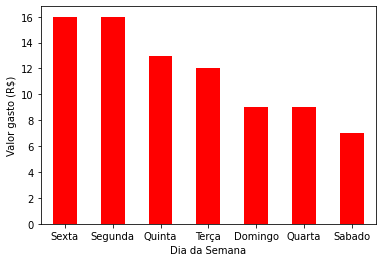

In [30]:
pedidos_diasemana.sort_values(ascending=False).plot(kind='bar', color='r', rot=0, ylabel = "Valor gasto (R$)", xlabel='Dia da Semana');

In [31]:
pedidos_mes = df2['mes'].value_counts()
pedidos_mes

Janeiro      11
Junho         9
Julho         8
Agosto        8
Outubro       8
Fevereiro     8
Novembro      8
Dezembro      6
Setembro      6
Maio          4
Abril         4
Março         2
Name: mes, dtype: int64

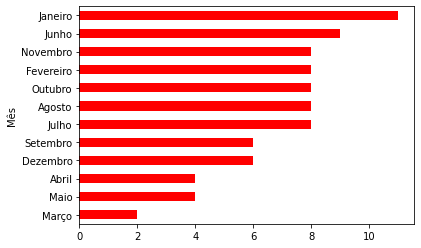

In [32]:
pedidos_mes.sort_values(ascending=True).plot(kind='barh', color = 'r', rot=0, xlabel = "Mês", ylabel='Número de Pedidos');

In [33]:
pedidos_hora = df2['horas'].value_counts()
pedidos_hora

21    17
15    15
22     9
20     8
19     6
14     6
23     5
16     5
18     4
17     3
13     2
12     1
0      1
Name: horas, dtype: int64

In [34]:
pedidos_periodo = df2['periodo'].value_counts()
pedidos_periodo

Noite        49
Tarde        32
Madrugada     1
Name: periodo, dtype: int64

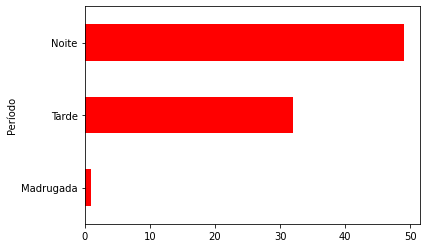

In [35]:
pedidos_periodo.sort_values(ascending=True).plot(kind='barh', color = 'r', rot=0,xlabel = "Período");

### Valor total gasto

In [36]:
df2['payments.total.value'].sum()

6358.78

### Valor gasto por mês

In [37]:
df_date = df2.set_index('createdAt')

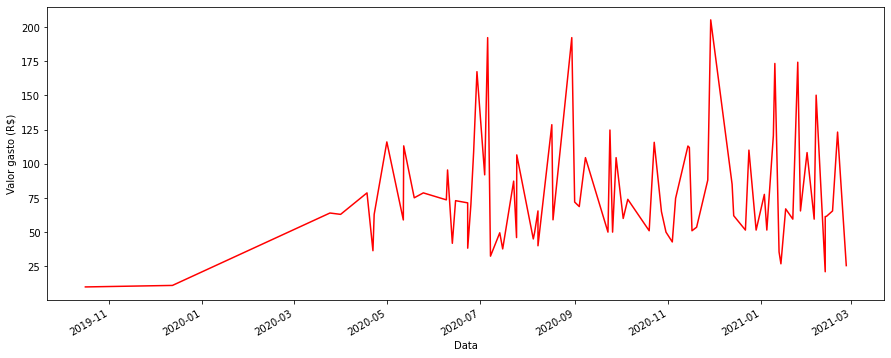

In [38]:
df_date['payments.total.value'].plot(style=['r-'], figsize=(15,6), ylabel = "Valor gasto (R$)", xlabel='Data');

### Locais com mais pedidos

In [39]:
df['delivery.address.city'].value_counts()

Ferraz de Vasconcelos    75
São Paulo                 3
Poa                       3
Sao Paulo                 1
Name: delivery.address.city, dtype: int64

### Restaurantes favoritos

In [40]:
rest = df2['merchant.name'].value_counts()
rest 

Spumoni Restaurante e Sorveteria                     21
Sodiê Doces - Ferraz de Vasconcelos Vila Açoreana    10
Burger King  - Av. Prof Luiz C Bueno                  8
Burguer Channel                                       7
Habib's - Itaquaquecetuba II                          7
Brasileirinho Delivery - Ferraz de Vasconcelos        5
Doce Magia Ferraz de Vasconcelos                      5
Pizzaria Donatello                                    4
Loop São Paulo Moema 2                                2
Mcdonald's  - Drive Suzano                            2
Three Burger                                          2
McDonald's - Drive Itaquaquecetuba (iba)              1
Banks Burger                                          1
Sodiê Doces - São Caetano Centro                      1
Mcdonald's - Ferraz de Vasconcelos                    1
Mcdonald's  - Suzano Shopping                         1
Rotisserie e Pizzaria Aop                             1
Cacau Show - Super Higas Itaim Paul             

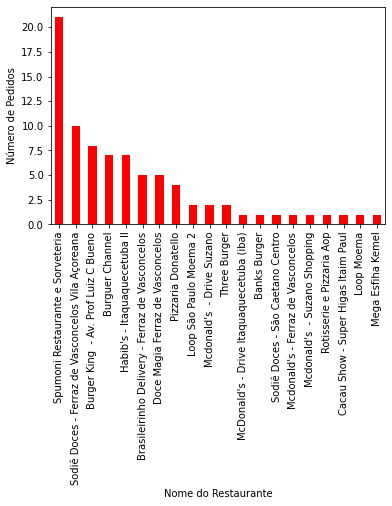

In [41]:
rest.plot(kind='bar', color='r', xlabel = "Nome do Restaurante", ylabel='Número de Pedidos');

### Restaurantes com maior valor gasto

In [42]:
maiores_gastos = df2.groupby('merchant.name')['payments.total.value'].sum().sort_values(ascending=False)
maiores_gastos

merchant.name
Spumoni Restaurante e Sorveteria                     1140.39
Burguer Channel                                      1029.97
Burger King  - Av. Prof Luiz C Bueno                  770.12
Habib's - Itaquaquecetuba II                          628.70
Sodiê Doces - Ferraz de Vasconcelos Vila Açoreana     439.97
Brasileirinho Delivery - Ferraz de Vasconcelos        393.86
Three Burger                                          347.70
Pizzaria Donatello                                    327.00
Doce Magia Ferraz de Vasconcelos                      316.90
Mcdonald's  - Drive Suzano                            224.18
Banks Burger                                          167.39
Mcdonald's  - Suzano Shopping                         150.19
Mcdonald's - Ferraz de Vasconcelos                    124.69
Mega Esfiha Kemel                                      73.00
McDonald's - Drive Itaquaquecetuba (iba)               69.99
Cacau Show - Super Higas Itaim Paul                    58.90
Sodiê Doce

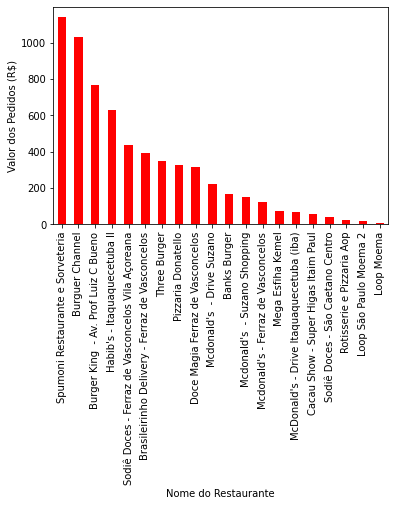

In [43]:
maiores_gastos.sort_values(ascending=False).plot(kind='bar', color = 'r', xlabel = "Nome do Restaurante", ylabel='Valor dos Pedidos (R$)');

### Principais meios de pagamento.

In [44]:
pagamentos = df2['payments.methods.method.description'].value_counts()
pagamentos

Vale-refeição       45
Crédito             31
Carteira digital     3
Débito               2
MEAL_VOUCHER         1
Name: payments.methods.method.description, dtype: int64

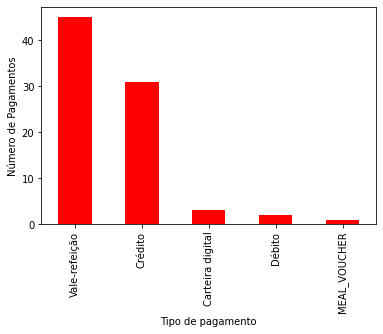

In [45]:
pagamentos.sort_values(ascending=False).plot(kind='bar', color = 'r', xlabel = "Tipo de pagamento", ylabel='Número de Pagamentos');

In [46]:
total = df2.groupby('payments.methods.method.description')['payments.total.value'].sum().sort_values(ascending=False).head(10);
total

payments.methods.method.description
Vale-refeição       3672.95
Crédito             2321.55
Carteira digital     199.49
Débito               153.80
MEAL_VOUCHER          10.99
Name: payments.total.value, dtype: float64

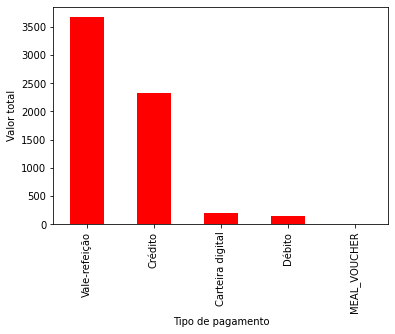

In [47]:
total.sort_values(ascending=False).plot(kind='bar', color = 'r', xlabel = "Tipo de pagamento", ylabel='Valor total');

In [48]:
valor_medio = df2.groupby('payments.methods.method.description')['payments.total.value'].mean().sort_values(ascending=False).head(10);
valor_medio

payments.methods.method.description
Vale-refeição       81.621111
Débito              76.900000
Crédito             74.888710
Carteira digital    66.496667
MEAL_VOUCHER        10.990000
Name: payments.total.value, dtype: float64

### Pratos favoritos


In [49]:
df2['bag.items.name'].value_counts().head(5)

Picadinho                         8
Virado á Paulista                 7
2 sanduíches + batata + bebida    5
GRANDE                            4
2 por R$19,90                     3
Name: bag.items.name, dtype: int64

### Valor médio, máximo e mínimo gastos num único item.


In [50]:
df2['bag.items.unitPrice'].max()

54.9

In [51]:
df2['bag.items.unitPrice'].min()

0.0

In [52]:
df2['bag.items.unitPrice'].mean()

16.531585365853662

### Valor médio, máximo e mínimo gastos no total.


In [53]:
df2['payments.total.value'].min()

9.9

In [54]:
df2['payments.total.value'].max()

205.3

In [55]:
df2['payments.total.value'].mean()

77.54609756097557

In [56]:
#df2.to_csv('/content/drive/MyDrive/CASE_IFOOD/Dados_Finais/ifood_case_ifood.csv')